In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# 폰트 설치 이후 런타임 다시시작

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [3]:
plt.rc('font', family = 'NanumBarunGothic')

In [4]:
sort_local = pd.read_csv('/content/gdrive/MyDrive/Local/Data/지역구분_충남_세종_대전_20_23.csv')
sort_local

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415065,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구
415066,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시
415067,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시
415068,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구


In [6]:
print('교통사고 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 401]))
print('교통불편 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 402]))
print('교통위반 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 403]))
print('사망, 대형사고 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 404]))
print('인피도주 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 405]))
print('음주운전 발생건수: ', len(sort_local[sort_local['EVT_CL_CD'] == 406]))


교통사고 발생건수:  255225
교통불편 발생건수:  58505
교통위반 발생건수:  33519
사망, 대형사고 발생건수:  21
인피도주 발생건수:  45
음주운전 발생건수:  67755


In [10]:
sort_local_401 = len(sort_local[sort_local['EVT_CL_CD'] == 401])
sort_local_402 = len(sort_local[sort_local['EVT_CL_CD'] == 402])
sort_local_403 = len(sort_local[sort_local['EVT_CL_CD'] == 403])
sort_local_404 = len(sort_local[sort_local['EVT_CL_CD'] == 404])
sort_local_405 = len(sort_local[sort_local['EVT_CL_CD'] == 405])
sort_local_406 = len(sort_local[sort_local['EVT_CL_CD'] == 406])

sort_local_type = [["교통사고",sort_local_401],["교통불편",sort_local_402],["교통위반",sort_local_403],["사망,대형사고",sort_local_404],["인피도주",sort_local_405],
        ["음주운전",sort_local_406]]

sort_local_type = pd.DataFrame(sort_local_type, columns = ['type', 'count'])


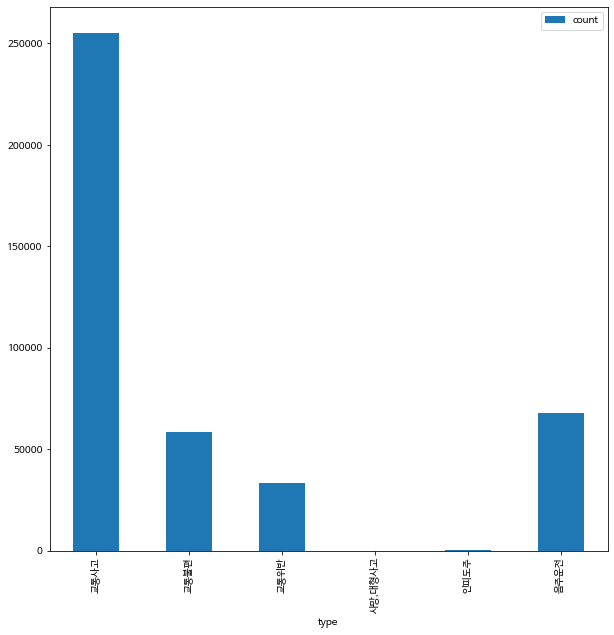

In [12]:
sort_local_type.plot(x = 'type', kind = 'bar', figsize = (10, 10))

In [19]:
sort_local_city_dj = len(sort_local[sort_local['RECV_DEPT_NM'] == '대전청'])
sort_local_city_cn = len(sort_local[sort_local['RECV_DEPT_NM'] == '충남청'])

sort_local_city=[["대전청",sort_local_city_dj],['충남청', sort_local_city_cn]]
sort_local_city = pd.DataFrame(sort_local_city, columns = ['지역', 'count'])

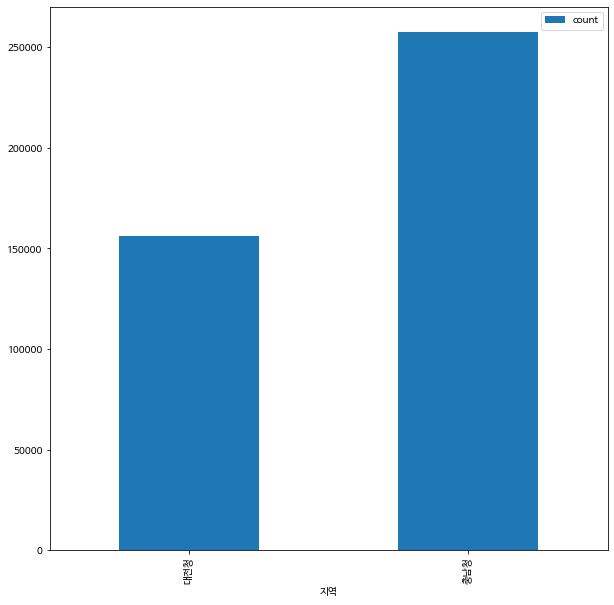

In [21]:
sort_local_city.plot(x = '지역', kind = 'bar', figsize = (10, 10))